In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import warnings

%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', 20)
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/train.csv')

In [3]:
data.head(5)

,Video_id,category_id,channel_title,subscriber,title,tags,description,Trend_day_count,Tag_count,Trend_tag_count,comment_count,comment_disabled,like dislike disabled,likes,dislike,tag appered in title,views,Unnamed: 17,Unnamed: 18
0,HDR9SQc79,22,CaseyNeistat,9086142.000,WE WANT TO TALK ABOUT OUR MARRIAGE,SHANtell martin,SHANTELL'S CHANNEL - https://www.youtube.com/s...,6.000,21,6,,FALSE,FALSE,13342,6089,False,1978978,nan,NaN
1,KNH52UF?48,24,LastWeekTonight,5937292.000,The Trump Presidency: Last Week Tonight with J...,last week tonight trump presidency|last week t...,"One year after the presidential election, John...",1.000,23,1,116266,TRUE,FALSE,5761,3044,False,1487870,nan,NaN
2,QTW28IRG36,23,Rudy Mancuso,4191209.000,"Racist Superman | Rudy Mancuso, King Bach & Le...",racist superman|rudy|mancuso|king|bach|racist|...,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,10.000,22,3,257850,TRUE,TRUE,0,0,True,1502102,nan,NaN
3,MGL76WI]26,24,Good Mythical Morning,13186408.000,Nickelback Lyrics: Real or Fake?,rhett and link|gmm|good mythical morning|rhett...,Today we find out if Link is a Nickelback amat...,12.000,17,5,263939,TRUE,TRUE,0,0,True,3519302,nan,NaN
4,TWP93KXT70,24,nigahiga,20563106.000,I Dare You: GOING BALD!?,ryan|higa|higatv|nigahiga|i dare you|idy|rhpc|...,I know it's been a while since we did this sho...,11.000,15,7,268085,TRUE,TRUE,0,0,True,4835374,nan,NaN


**Data Cleaning**

In [4]:
rows = len(data)
cols = len(data.columns)
print('Number of rows in data : ', rows)
print('Number of columns in data : ', cols)

Number of rows in data :  3198
Number of columns in data :  19


In [5]:
data.columns

Index(['Video_id', 'category_id', 'channel_title', 'subscriber', 'title',
       'tags', 'description', 'Trend_day_count', 'Tag_count',
       'Trend_tag_count', 'comment_count', 'comment_disabled',
       'like dislike disabled', 'likes', 'dislike', 'tag appered in title',
       'views', 'Unnamed: 17', 'Unnamed: 18'],
      dtype='object')

**It seems like there are two unnamed columns in our data. Let's check them out first**

In [6]:
data['Unnamed: 17'].head()

0   nan
1   nan
2   nan
3   nan
4   nan
Name: Unnamed: 17, dtype: float64

In [7]:
print('Total number of null values in column "Unnamed: 17" : ', sum(data['Unnamed: 17'].isnull()))

Total number of null values in column "Unnamed: 17" :  3197


**So, it confirms that column "Unnamed: 17" only contains null values in almost each row. It will most probably not affect the whole data if I drop this column.**

In [8]:
data['Unnamed: 18'].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: Unnamed: 18, dtype: object

In [9]:
print('Total number of null values in column "Unnamed: 18" : ', sum(data['Unnamed: 18'].isnull()))

Total number of null values in column "Unnamed: 18" :  3197


**We can also drop the column "Unnamed: 18"**

In [10]:
data.drop(columns=['Unnamed: 17', 'Unnamed: 18'], inplace=True)

In [11]:
#Let's check the columns again
data.columns

Index(['Video_id', 'category_id', 'channel_title', 'subscriber', 'title',
       'tags', 'description', 'Trend_day_count', 'Tag_count',
       'Trend_tag_count', 'comment_count', 'comment_disabled',
       'like dislike disabled', 'likes', 'dislike', 'tag appered in title',
       'views'],
      dtype='object')

In [12]:
#Let's change the name of every column to lower case for convinience
data.columns = [c.lower() for c in data.columns]

In [13]:
data.columns

Index(['video_id', 'category_id', 'channel_title', 'subscriber', 'title',
       'tags', 'description', 'trend_day_count', 'tag_count',
       'trend_tag_count', 'comment_count', 'comment_disabled',
       'like dislike disabled', 'likes', 'dislike', 'tag appered in title',
       'views'],
      dtype='object')

In [14]:
#Let's analyse video_id column
data['video_id']

0        HDR9SQc79
1       KNH52UF?48
2       QTW28IRG36
3       MGL76WI]26
4       TWP93KXT70
           ...    
3193    OKR48DOE67
3194    QJK69DS?91
3195    VHF51NVr11
3196    XHU22OAJ39
3197    IFD79NSG47
Name: video_id, Length: 3198, dtype: object

In [15]:
print('Null values in "video_id" column :', sum(data['video_id'].isnull()))

Null values in "video_id" column : 0


In [16]:
len(data['video_id'].unique())

3198

In [17]:
# As video_id is unique for every video we can use it as an index column
data.set_index('video_id', inplace=True)

In [19]:
#Now let's analyse the category_id column
data['category_id']

video_id
HDR9SQc79     22
KNH52UF?48    24
QTW28IRG36    23
MGL76WI]26    24
TWP93KXT70    24
              ..
OKR48DOE67    20
QJK69DS?91    10
VHF51NVr11    10
XHU22OAJ39    26
IFD79NSG47    22
Name: category_id, Length: 3198, dtype: object

In [20]:
#Unique values in category_id column
data['category_id'].unique()

array(['22', '24', '23', '28', '1', '25', '17', '10', '15', '27', '26',
       '2', '19', '20', nan, '29', '“24', '43'], dtype=object)

In [21]:
data['category_id'].value_counts()

24     786
10     415
26     303
25     294
23     283
22     246
17     204
28     186
1      163
27     117
15      74
2       44
20      35
19      31
29       8
43       2
“24      1
Name: category_id, dtype: int64

In [22]:
data.category_id.replace("“24", '24', inplace=True)

In [23]:
data['category_id'].unique()

array(['22', '24', '23', '28', '1', '25', '17', '10', '15', '27', '26',
       '2', '19', '20', nan, '29', '43'], dtype=object)

In [24]:
data['category_id'].value_counts()

24    787
10    415
26    303
25    294
23    283
22    246
17    204
28    186
1     163
27    117
15     74
2      44
20     35
19     31
29      8
43      2
Name: category_id, dtype: int64

Text(0.5, 1.0, 'Frequency of every category in category_id')

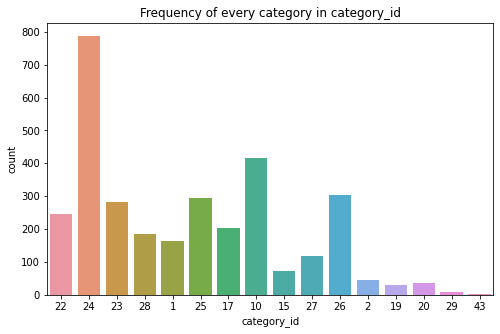

In [25]:
#let's plot it
plt.figure(figsize=(8, 5))
sns.countplot(data['category_id'])
plt.title('Frequency of every category in category_id')

In [26]:
print('Null values in "category_id" column: ', sum(data['category_id'].isnull()))

Null values in "category_id" column:  6


In [27]:
#Imputing null values with mode of the column category_id
data.category_id.fillna(data.category_id.mode()[0], inplace=True)

In [28]:
data['category_id'].unique()

array(['22', '24', '23', '28', '1', '25', '17', '10', '15', '27', '26',
       '2', '19', '20', '29', '43'], dtype=object)

In [30]:
#Now let's analyse channel_title column
data['channel_title']

video_id
HDR9SQc79              CaseyNeistat
KNH52UF?48          LastWeekTonight
QTW28IRG36             Rudy Mancuso
MGL76WI]26    Good Mythical Morning
TWP93KXT70                 nigahiga
                      ...          
OKR48DOE67           EA SPORTS FIFA
QJK69DS?91            JackWhiteVEVO
VHF51NVr11           JamesBlakeVEVO
XHU22OAJ39               Refinery29
IFD79NSG47                  MN khan
Name: channel_title, Length: 3198, dtype: object

In [31]:
data['channel_title'].value_counts()

Refinery29                                34
The Tonight Show Starring Jimmy Fallon    34
TheEllenShow                              29
Vox                                       29
NFL                                       28
                                          ..
TromaMovies                                1
Dj Earworm                                 1
Passenger                                  1
FrenchMontanaVEVO                          1
yovo68                                     1
Name: channel_title, Length: 1501, dtype: int64

In [32]:
#So it seems like the variable channel_title is not going to contribute much for the 
#prediction of number of views on that video. We can drop this column
data.drop('channel_title', axis=1, inplace=True)

In [34]:
#analysing subscriber column
data['subscriber'].describe()

count         3175.000
mean       3823980.791
std       28657707.858
min              0.000
25%         242880.000
50%        1241220.000
75%        3812621.500
max     1576229455.000
Name: subscriber, dtype: float64

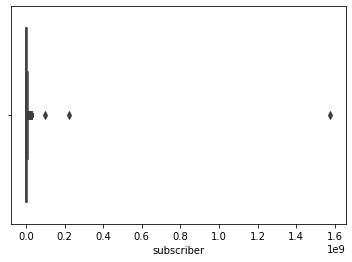

In [35]:
sns.boxplot(data['subscriber'])

In [36]:
#There are very large outliers here. Removing the outlier
data.drop(list(data[data['subscriber'] > data.subscriber.quantile(.999)].index), inplace=True)

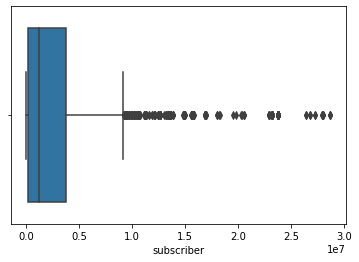

In [37]:
sns.boxplot(data.subscriber)

In [38]:
#imputing null values with mean
data.subscriber.fillna(int(data.subscriber.mean()), inplace=True)

In [40]:
#Droping the title, tags and description column as tag_appeared in title variable
#can be used for views prediction instead of these three
data.drop(columns=['title', 'tags', 'description'], inplace=True)

In [41]:
sum(data.trend_day_count.isnull())

1

In [42]:
data = data[~data.trend_day_count.isnull()]

In [43]:
data.trend_day_count.describe()

count   3194.000
mean       7.964
std       78.593
min        0.000
25%        4.000
50%        7.000
75%       10.000
max     4444.000
Name: trend_day_count, dtype: float64

In [44]:
data = data[data.trend_day_count != 4444]

In [45]:
data.tag_count.unique()

array(['21', '23', '22', '17', '15', '9', '14', '20', '8', '10', '18',
       '19', '25', '12', '24', '16', '11', '13', '3222', '3225', nan, '0'],
      dtype=object)

In [46]:
sum(data.tag_count.isnull())

1

In [47]:
data = data[~data.tag_count.isnull()]

In [48]:
data = data[~data.tag_count.isin(['3225', '3222'])]

In [49]:
data.tag_count.unique()

array(['21', '23', '22', '17', '15', '9', '14', '20', '8', '10', '18',
       '19', '25', '12', '24', '16', '11', '13', '0'], dtype=object)

In [50]:
data.tag_count = data.tag_count.astype(int)

In [51]:
data.trend_tag_count.describe()

count     3189
unique       9
top          3
freq       473
Name: trend_tag_count, dtype: object

In [52]:
data.trend_tag_count.unique()

array(['6', '1', '3', '5', '7', '2', '4', nan, '>', '9903'], dtype=object)

In [53]:
data.trend_tag_count.value_counts()

3       473
6       473
2       460
5       459
4       449
7       444
1       429
9903      1
>         1
Name: trend_tag_count, dtype: int64

In [54]:
data = data[~data.trend_tag_count.isin(['>', '9903'])]

In [55]:
data = data[~data.trend_tag_count.isnull()]
data.trend_tag_count = data.trend_tag_count.astype(int)

In [57]:
data.comment_count.describe()

count     3187
unique    2166
top           
freq      1012
Name: comment_count, dtype: object

In [58]:
data.comment_disabled.replace({'TRUE': True, 'FALSE': False}, inplace=True)

In [59]:
data.comment_disabled.describe()

count     3187
unique       2
top       True
freq      2175
Name: comment_disabled, dtype: object

In [60]:
comment_count = np.where(data.comment_disabled, data.comment_count, 0).astype(int)

In [63]:
data.comment_count = comment_count

In [64]:
data.comment_count.describe()

count     3187.000
mean    112515.924
std     101893.166
min          0.000
25%          0.000
50%      99490.000
75%     203279.000
max     299877.000
Name: comment_count, dtype: float64

In [65]:
data.drop('comment_disabled', axis=1, inplace=True)

In [66]:
data.replace({'TRUE':True, 'FALSE':False}, inplace=True)

In [67]:
data['like dislike disabled'].describe()

count      3187
unique        2
top       False
freq       2348
Name: like dislike disabled, dtype: object

In [68]:
data.likes.describe()

count     3187
unique    2204
top          0
freq       839
Name: likes, dtype: object

In [69]:
sum(data.likes.isnull())

0

In [70]:
data.dislike.describe()

count     3187
unique    2149
top          0
freq       840
Name: dislike, dtype: object

In [71]:
sum(data.dislike.isnull())

0

In [75]:
data.likes = data.likes.astype(int)
data.dislike = data.dislike.astype(int)
data.subscriber = data.subscriber.astype(int)
data.trend_day_count = data.trend_day_count.astype(int)

In [74]:
data.drop('like dislike disabled', axis=1, inplace=True)

In [76]:
data['tag appered in title'].replace({True:1, False:0}, inplace=True)

In [77]:
data = data[~data['tag appered in title'].isnull()]

In [78]:
data['tag appered in title'] = data['tag appered in title'].astype(int)

In [79]:
data['tag appered in title']

video_id
HDR9SQc79     0
KNH52UF?48    0
QTW28IRG36    1
MGL76WI]26    1
TWP93KXT70    1
             ..
OKR48DOE67    0
QJK69DS?91    1
VHF51NVr11    1
XHU22OAJ39    1
IFD79NSG47    1
Name: tag appered in title, Length: 3186, dtype: int64

In [80]:
data.head()

,category_id,subscriber,trend_day_count,tag_count,trend_tag_count,comment_count,likes,dislike,tag appered in title,views
video_id,,,,,,,,,,
HDR9SQc79,22,9086142,6,21,6,0,13342,6089,0,1978978
KNH52UF?48,24,5937292,1,23,1,116266,5761,3044,0,1487870
QTW28IRG36,23,4191209,10,22,3,257850,0,0,1,1502102
MGL76WI]26,24,13186408,12,17,5,263939,0,0,1,3519302
TWP93KXT70,24,20563106,11,15,7,268085,0,0,1,4835374


In [81]:
data.views.describe()

count       3186
unique      3182
top       858323
freq           2
Name: views, dtype: object

In [82]:
for i in data.views.unique():
  if not i.isdigit():
    print(i)

#VALUE!


In [83]:
data = data[~(data['views'] == '#VALUE!')]

In [84]:
data.views = data.views.astype(int)

In [85]:
sum(data.isnull().values)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3185 entries, HDR9SQc79 to IFD79NSG47
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   category_id           3185 non-null   object
 1   subscriber            3185 non-null   int64 
 2   trend_day_count       3185 non-null   int64 
 3   tag_count             3185 non-null   int64 
 4   trend_tag_count       3185 non-null   int64 
 5   comment_count         3185 non-null   int64 
 6   likes                 3185 non-null   int64 
 7   dislike               3185 non-null   int64 
 8   tag appered in title  3185 non-null   int64 
 9   views                 3185 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 273.7+ KB


**Analysing the data**

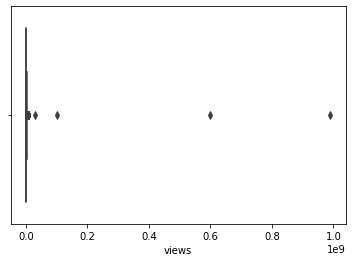

In [87]:
sns.boxplot(data.views)

In [88]:
#removing outliers from views
data = data[~(data.views > 1e7)]

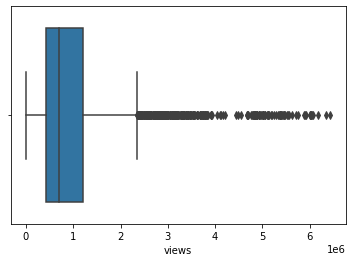

In [100]:
sns.boxplot(data.views)

In [104]:
#normalizing and standardizing the views and subscriber variable
data.views = (data.views - data.views.mean())/ data.views.std()
data.subscriber = (data.subscriber - data.subscriber.mean())/data.subscriber.std()

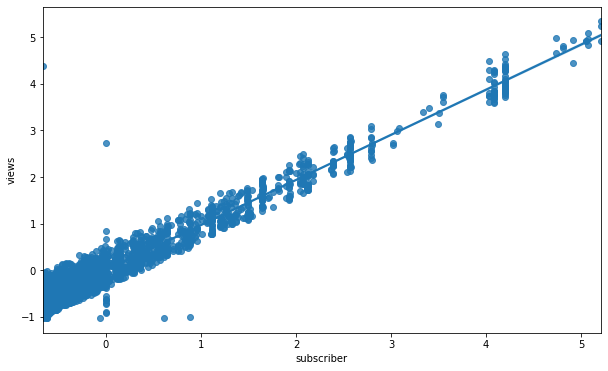

In [145]:
plt.figure(figsize=(10, 6))
sns.regplot(data.subscriber, data.views)

In [146]:
print('Correlation coefficient : ', data.subscriber.corr(data.views))

Correlation coefficient :  0.9679486703229362


Subscriber variable is an important variable to predict the number of views in video because of its strong positive linear relationship with views variable

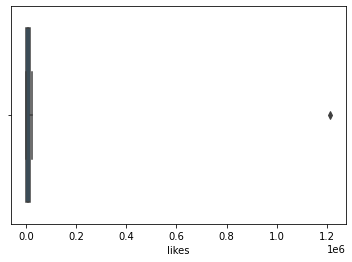

In [113]:
sns.boxplot(data.likes)

In [129]:
#removing outliers from likes variable
data = data[~(data.likes > 0.3e6)]

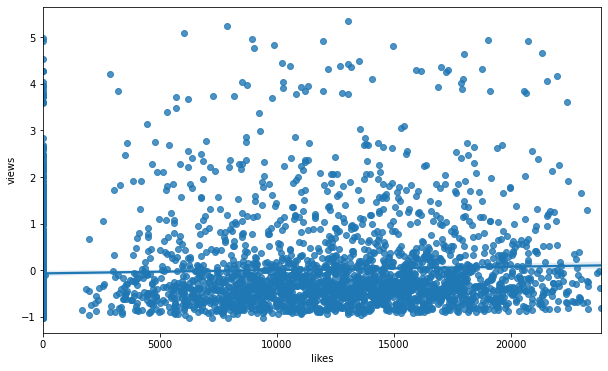

In [144]:
plt.figure(figsize=(10, 6))
sns.regplot(data.likes, data.views)

In [133]:
print('Correlation coefficient : ', data.likes.corr(data.views))

Correlation coefficient :  0.04992902760269811


There is no linear relationship between the likes and views varible.

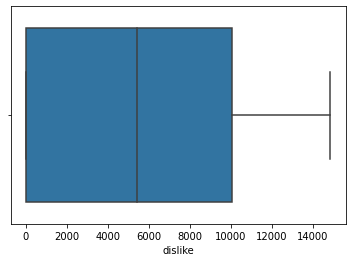

In [136]:
sns.boxplot(data.dislike)

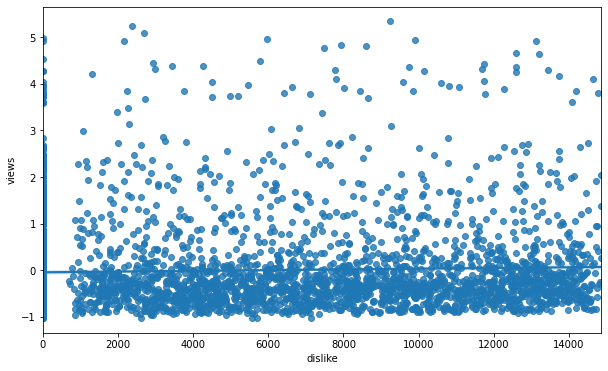

In [143]:
plt.figure(figsize=(10, 6))
sns.regplot(data.dislike, data.views)

In [137]:
print('Correlation coefficient : ', data.dislike.corr(data.views))

Correlation coefficient :  0.037423291070624636


There is no linear relationship between dislike and views variable.

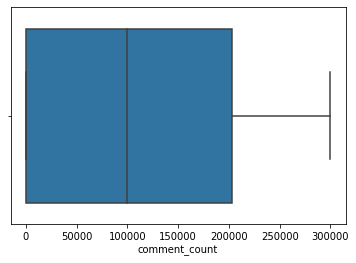

In [138]:
sns.boxplot(data['comment_count'])

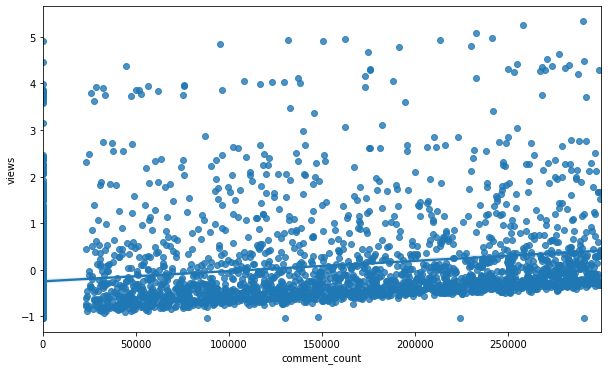

In [142]:
plt.figure(figsize=(10, 6))
sns.regplot(data.comment_count, data.views)

In [140]:
print('Correlation coefficient : ', data.comment_count.corr(data.views))

Correlation coefficient :  0.22362700129812327


There is moderate linear positive relationship between comment_count and views variable

In [147]:
#dropping the unrelated variables
data.drop(['likes', 'dislike'], axis=1, inplace=True)

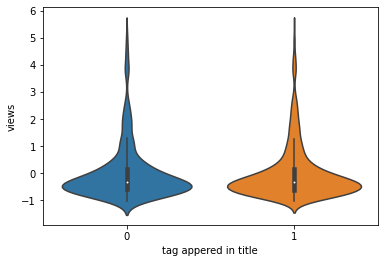

In [160]:
sns.violinplot(data['tag appered in title'], data.views)

This plot shows that it doesn't matter if the given tag appears in the title or not the distribution of the number of views of that respective video is independent of the tag appered in title variable. 

In [162]:
data.drop('tag appered in title', axis=1, inplace=True)

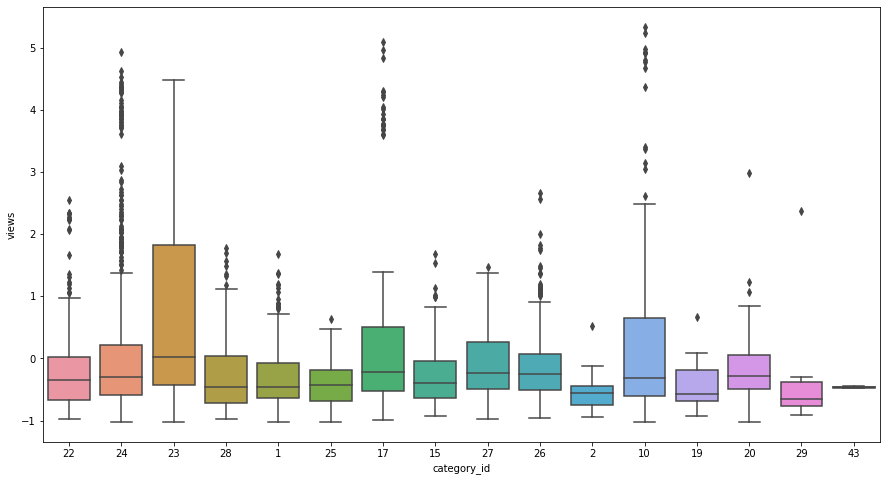

In [167]:
plt.figure(figsize=(15, 8))
sns.boxplot(data.category_id, data.views)

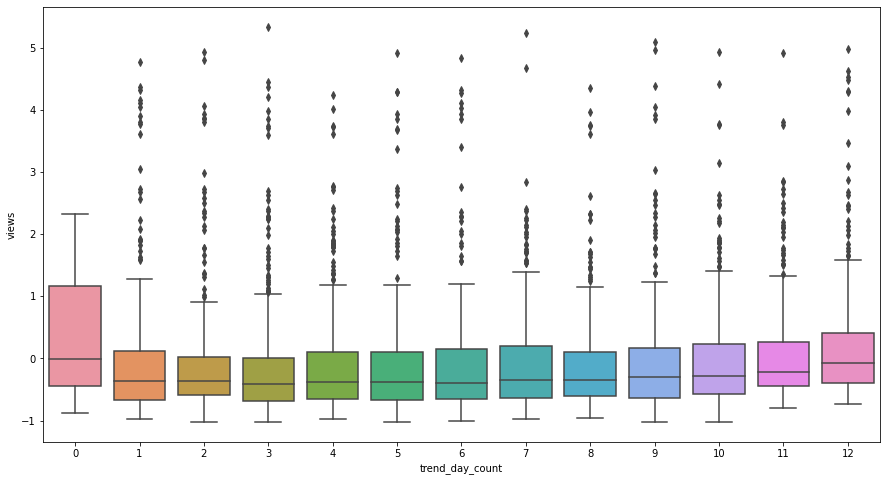

In [168]:
plt.figure(figsize=(15, 8))
sns.boxplot(data.trend_day_count, data.views)

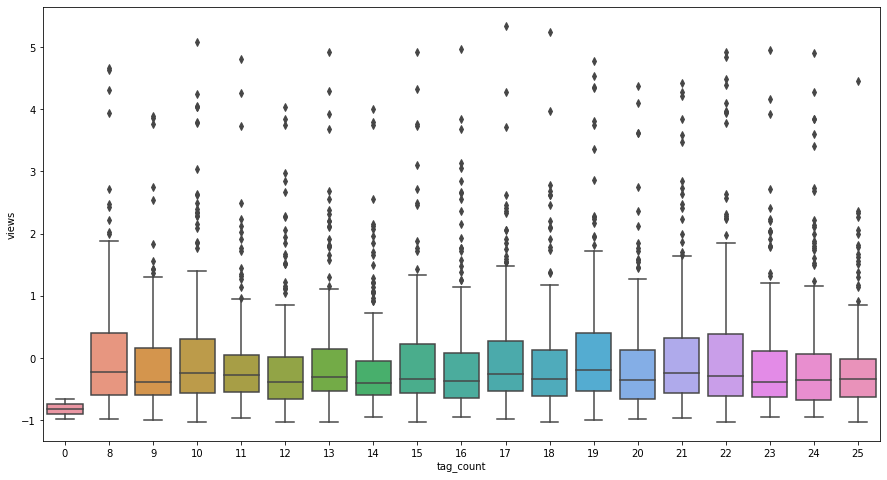

In [169]:
plt.figure(figsize=(15, 8))
sns.boxplot(data.tag_count, data.views)

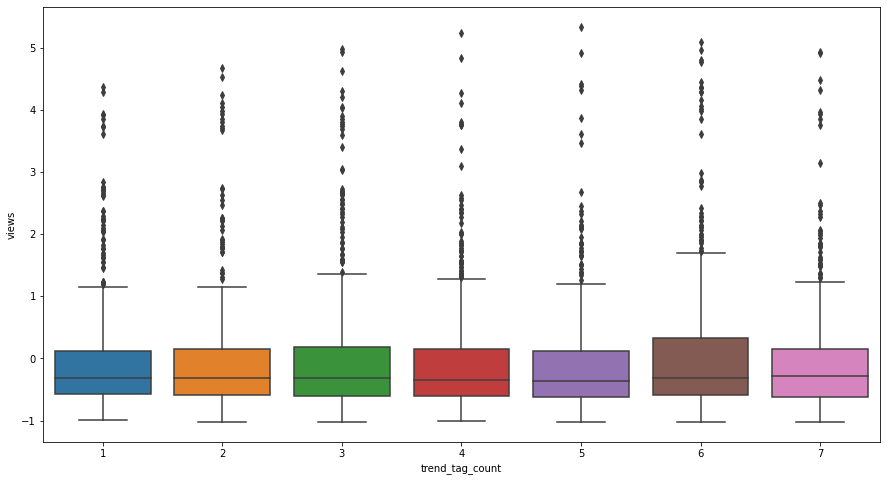

In [170]:
plt.figure(figsize=(15, 8))
sns.boxplot(data.trend_tag_count, data.views)

In [171]:
data.drop(['comment_count', 'trend_tag_count', 'tag_count'], axis=1, inplace=True)

In [172]:
data.head()

,category_id,subscriber,trend_day_count,views
video_id,,,,
HDR9SQc79,22,1.198,6,0.932
KNH52UF?48,24,0.553,1,0.447
QTW28IRG36,23,0.196,10,0.461
MGL76WI]26,24,2.037,12,2.454
TWP93KXT70,24,3.547,11,3.755


In [174]:
d = data.copy()

In [173]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3180 entries, HDR9SQc79 to IFD79NSG47
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   category_id      3180 non-null   object 
 1   subscriber       3180 non-null   float64
 2   trend_day_count  3180 non-null   int64  
 3   views            3180 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 284.2+ KB


**Model building**

In [175]:
Y = d.pop('views').values
X = d.values

In [176]:
Y = Y.reshape(Y.shape[0], 1)

In [177]:
print('Shape of X:', X.shape)
print('Shape of Y:', Y.shape)

Shape of X: (3180, 3)
Shape of Y: (3180, 1)


In [183]:
train_d, x_val, train_l, y_val = train_test_split(X, Y, test_size=0.05, shuffle=True)

In [184]:
x_train, x_test, y_train, y_test = train_test_split(train_d, train_l, test_size=0.052, shuffle=True)

In [185]:
print('Shape of x_train:', x_train.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of x_val:', x_val.shape)
print('Shape of y_val:', y_val.shape)
print('Shape of x_test:', x_test.shape)
print('Shape of y_test:', y_test.shape)

Shape of x_train: (2863, 3)
Shape of y_train: (2863, 1)
Shape of x_val: (159, 3)
Shape of y_val: (159, 1)
Shape of x_test: (158, 3)
Shape of y_test: (158, 1)


In [186]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [194]:
print('Value of Coefficient of determination (R^2) for training data   : ', reg.score(x_train, y_train))
print('Value of Coefficient of determination (R^2) for validation data : ', reg.score(x_val, y_val))
print('Value of Coefficient of determination (R^2) for test data       : ', reg.score(x_test, y_test))

Value of Coefficient of determination (R^2) for training data   :  0.9405429939716083
Value of Coefficient of determination (R^2) for validation data :  0.9390023885925212
Value of Coefficient of determination (R^2) for test data       :  0.9473669658473401
